# Hierarchical Clustering

In K-Means clustering, we need to specify the number of clusters before running the algorithm. However, specifying the number of clusters is not a simple task. **In hierarchical clustering, we do not specify the number of clusters at the beginning**. We allow the algorithm to aggregate all the data.

Hierarchical clustering algorithms operate clusters by hierarchically combining data, taking into account the similarities of the data. Therefore, these algorithms produce different cluster levels, and we choose the best according to our needs.

Hierarchical clustering is a technique that aims to create **a tree-like cluster hierarchy** within the data. This tree-like hierarchical representation of clusters is called a **dendrogram**. a dendrogram is a branching diagram that represents the relationships of similarity among a group of entitites. Similarity is distance between two entitites.

We use **Linkage Matrix**, which is a mathematical matrix, to build out a dendrogram. 

Another key topic is the **similarity metric**. Like in K means clustering, the similarity metric measures the **distance between two points** through lots of different ways such as Euclidean distance, Manhattan distance, Cosine distance, and many more options. By default, we'll use Euclidean distance which is quite a decent one. (clustering icin en benzer-most similar 2 nokta blunacak. peki "en benzer" naisl olculur? Euclidian distance (noktalar arası mesafelerin toplamının karekoku (phytgorean theyroye gore hesaplanmis hyphuteanus) veya Manhattan distance (mesafelerin abs'nin toplamı)

**There are two types of hierarchical clustering approaches**:

**1. Agglomerative hierarchical clustering approach (Bottom-up approach)**: In this approach, at first, each data is considered as a cluster, and according to their similarity, these data/clusters are continued to cluster until the cluster is the highest point and become a single cluster. It’s also known as AGNES (Agglomerative Nesting). Steps are:

    - Combines the two most similar clusters, thereby reducing the total number of clusters by one.
    - Then, repeat the previous step until only one cluster remains.
    
**2. Divisive hierarchical clustering approach (Top-down approach)**: This approach, also called **split clustering**, starts with a single cluster. Afterthat,

    - Uses a parametric clustering algorithm such as k-mean to divide the cluster into two clusters.
    - Repeats the above step for each subset until all observations are clustered as independent sets.

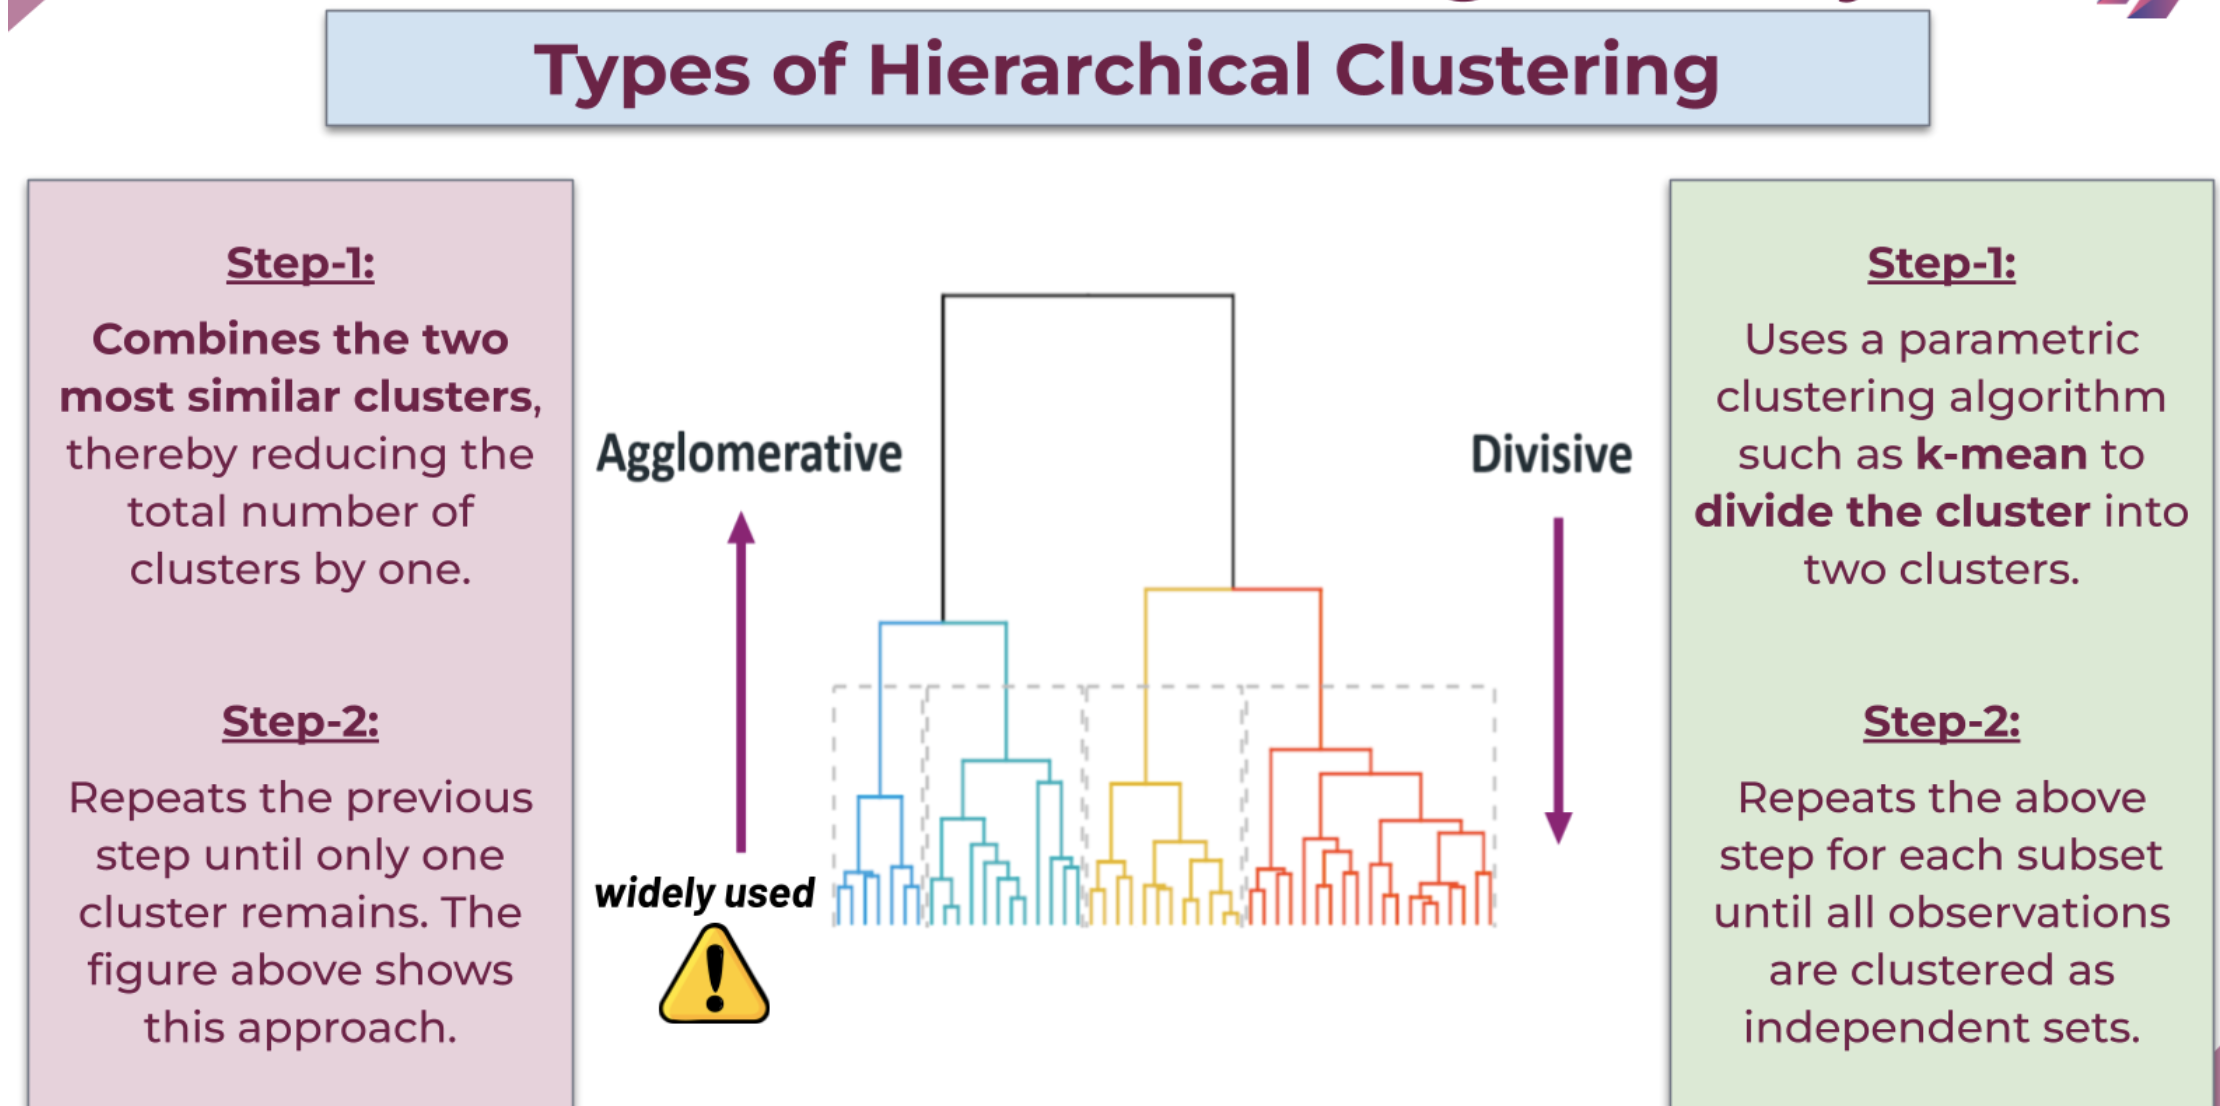

**Key Terms in hierarchical clustering**

Hierarchical clustering is a type of clustering analysis where objects or data points are grouped together based on their similarity/dissimilarity. Here are some key terms in hierarchical clustering :

- **Clustering**: The process of grouping similar objects or data points together based on their features.
- **Hierarchical clustering**: A clustering method that builds a hierarchy of clusters by recursively dividing or merging clusters based on their similarity.
- **Dendrogram**: A tree-like diagram that represents the hierarchical structure of clusters. It shows the order in which clusters are merged or divided and the distance between them.
- **Linkage**: A measure of distance or similarity between clusters that determines which clusters should be merged at each step of the hierarchical clustering process. There are several types of linkage methods such as single linkage, complete linkage, and average linkage.
- **Single linkage**: A linkage method that uses the shortest distance between the closest points of two clusters as the measure of similarity.
- **Complete linkage**: A linkage method that uses the longest distance between the farthest points of two clusters as the measure of similarity.
- **Average linkage**: A linkage method that uses the average distance between all pairs of points from two clusters as the measure of similarity.
- **Cluster distance**: The distance between two clusters in a dendrogram. It can be measured using various distance metrics such as Euclidean distance, Manhattan distance, or cosine similarity.
- **Cut-off threshold**: A distance or similarity value used to determine the number of clusters in the dendrogram. Clusters that are closer than the cut-off threshold are merged, while those that are farther apart are considered separate clusters.
- **The decision line or criterion for determining the number of clusters** in hierarchical clustering is often based on a cut-off threshold for the cluster distance or similarity measure. The cut-off threshold is a value that determines the maximum distance or dissimilarity between clusters at which they can be merged into a larger cluster.

The decision line is typically represented as a horizontal line on the dendrogram, which is a graphical representation of the hierarchical clustering process. The height of the decision line represents the cut-off threshold for the cluster distance or similarity measure.

Overall, hierarchical clustering is a useful method for exploring the structure of complex data sets and identifying groups of similar objects.

**Hierarchical clustering can be used in various fields and for different types of problems where grouping of objects or data points based on their similarity is needed**. Here are some examples of problems where hierarchical clustering is commonly used:

- **Biological data analysis**: In bioinformatics, hierarchical clustering is used to cluster genes or proteins based on their expression levels or sequence similarities.
- **Market segmentation**: In marketing, hierarchical clustering is used to segment customers based on their demographic or behavioral similarities.
- **Image segmentation**: In computer vision, hierarchical clustering is used to segment images into regions based on their color or texture similarities.
- **Social network analysis**: In sociology and network science, hierarchical clustering is used to cluster individuals or groups based on their social connections or interaction patterns.
- **Customer profiling**: In customer relationship management, hierarchical clustering is used to profile customers based on their purchase history or preferences.
- **Anomaly detection**: In outlier detection, hierarchical clustering can be used to identify unusual or abnormal data points that do not belong to any cluster.

Overall, hierarchical clustering is a versatile tool that can be applied to a wide range of problems where clustering or grouping of similar objects is needed.

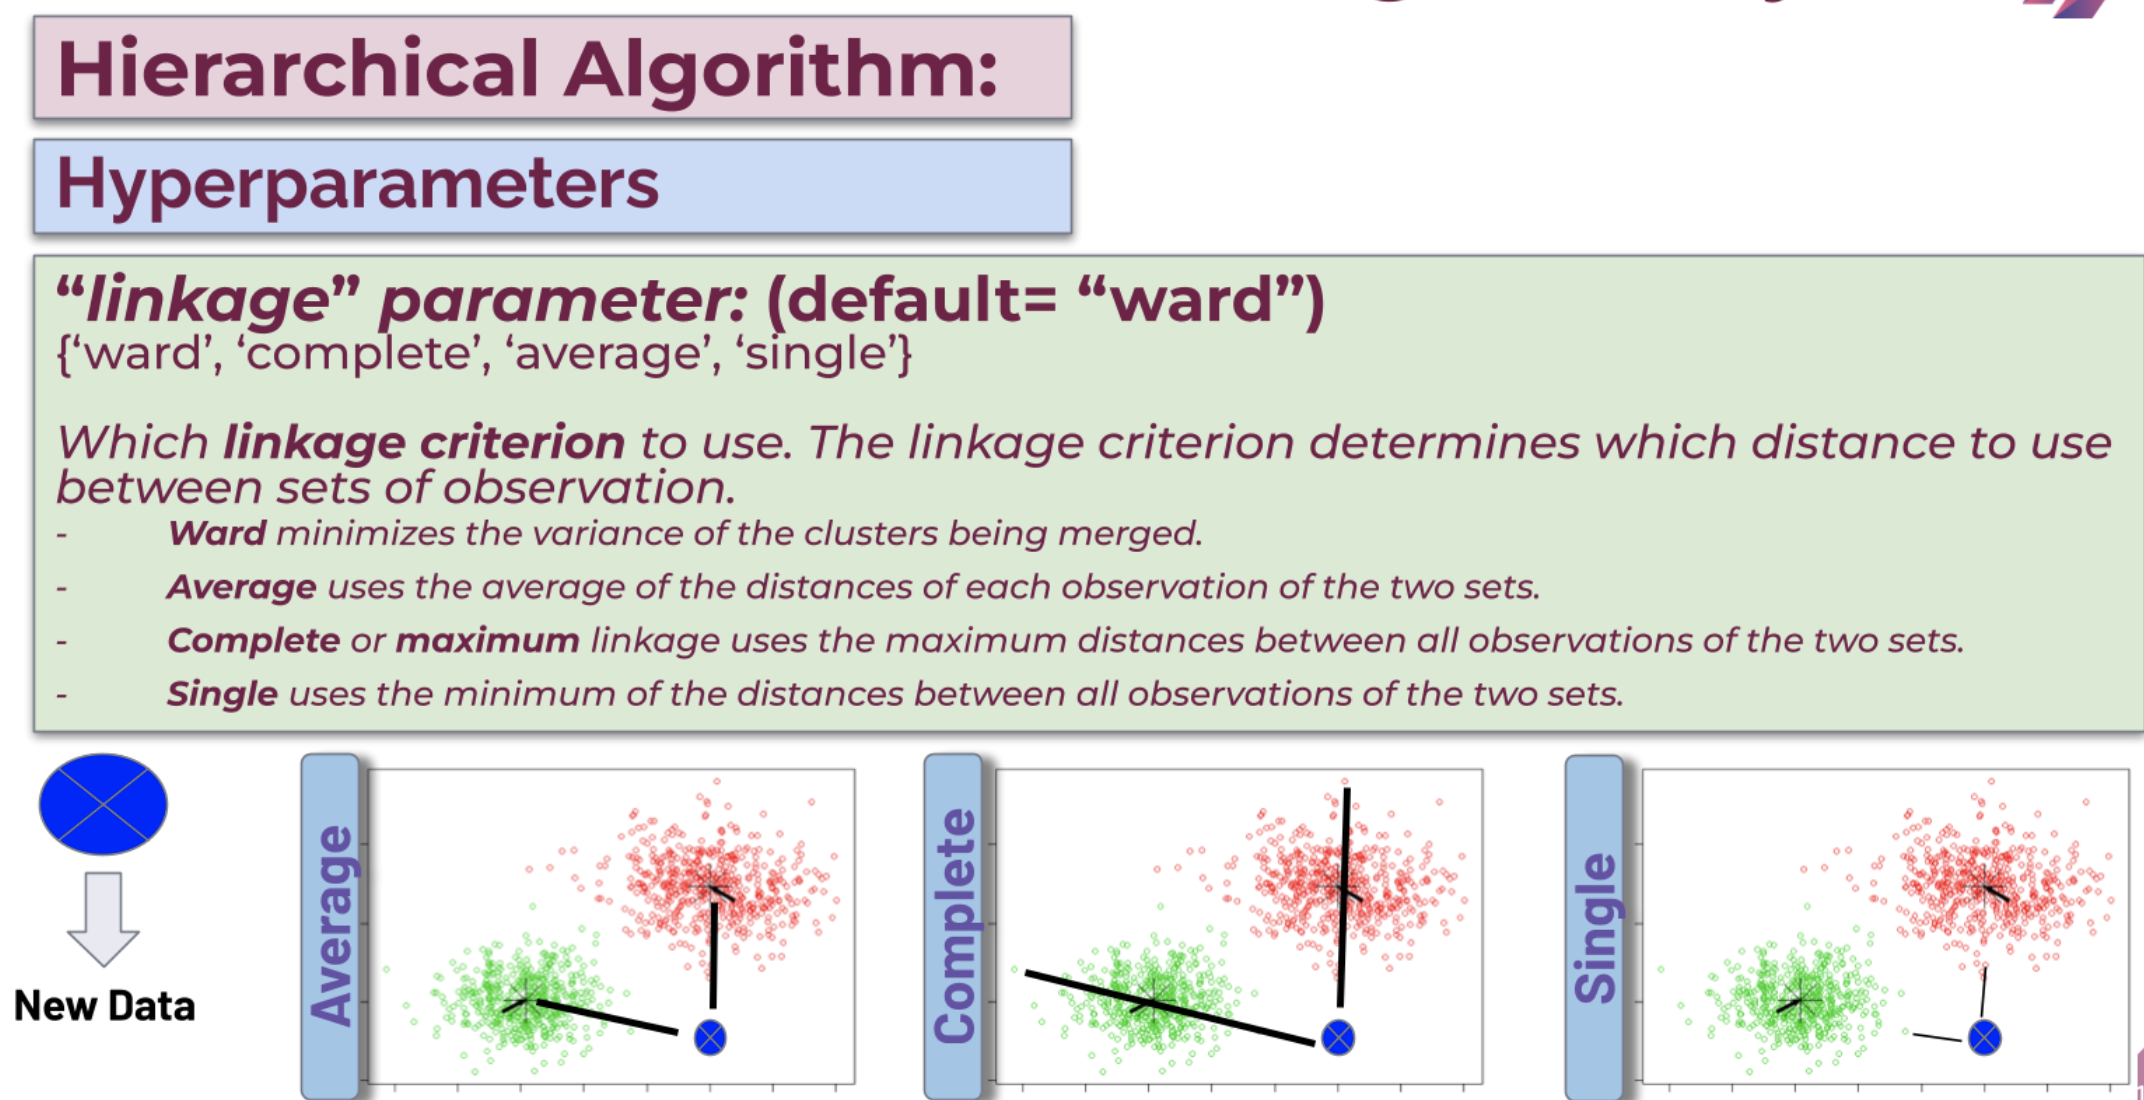

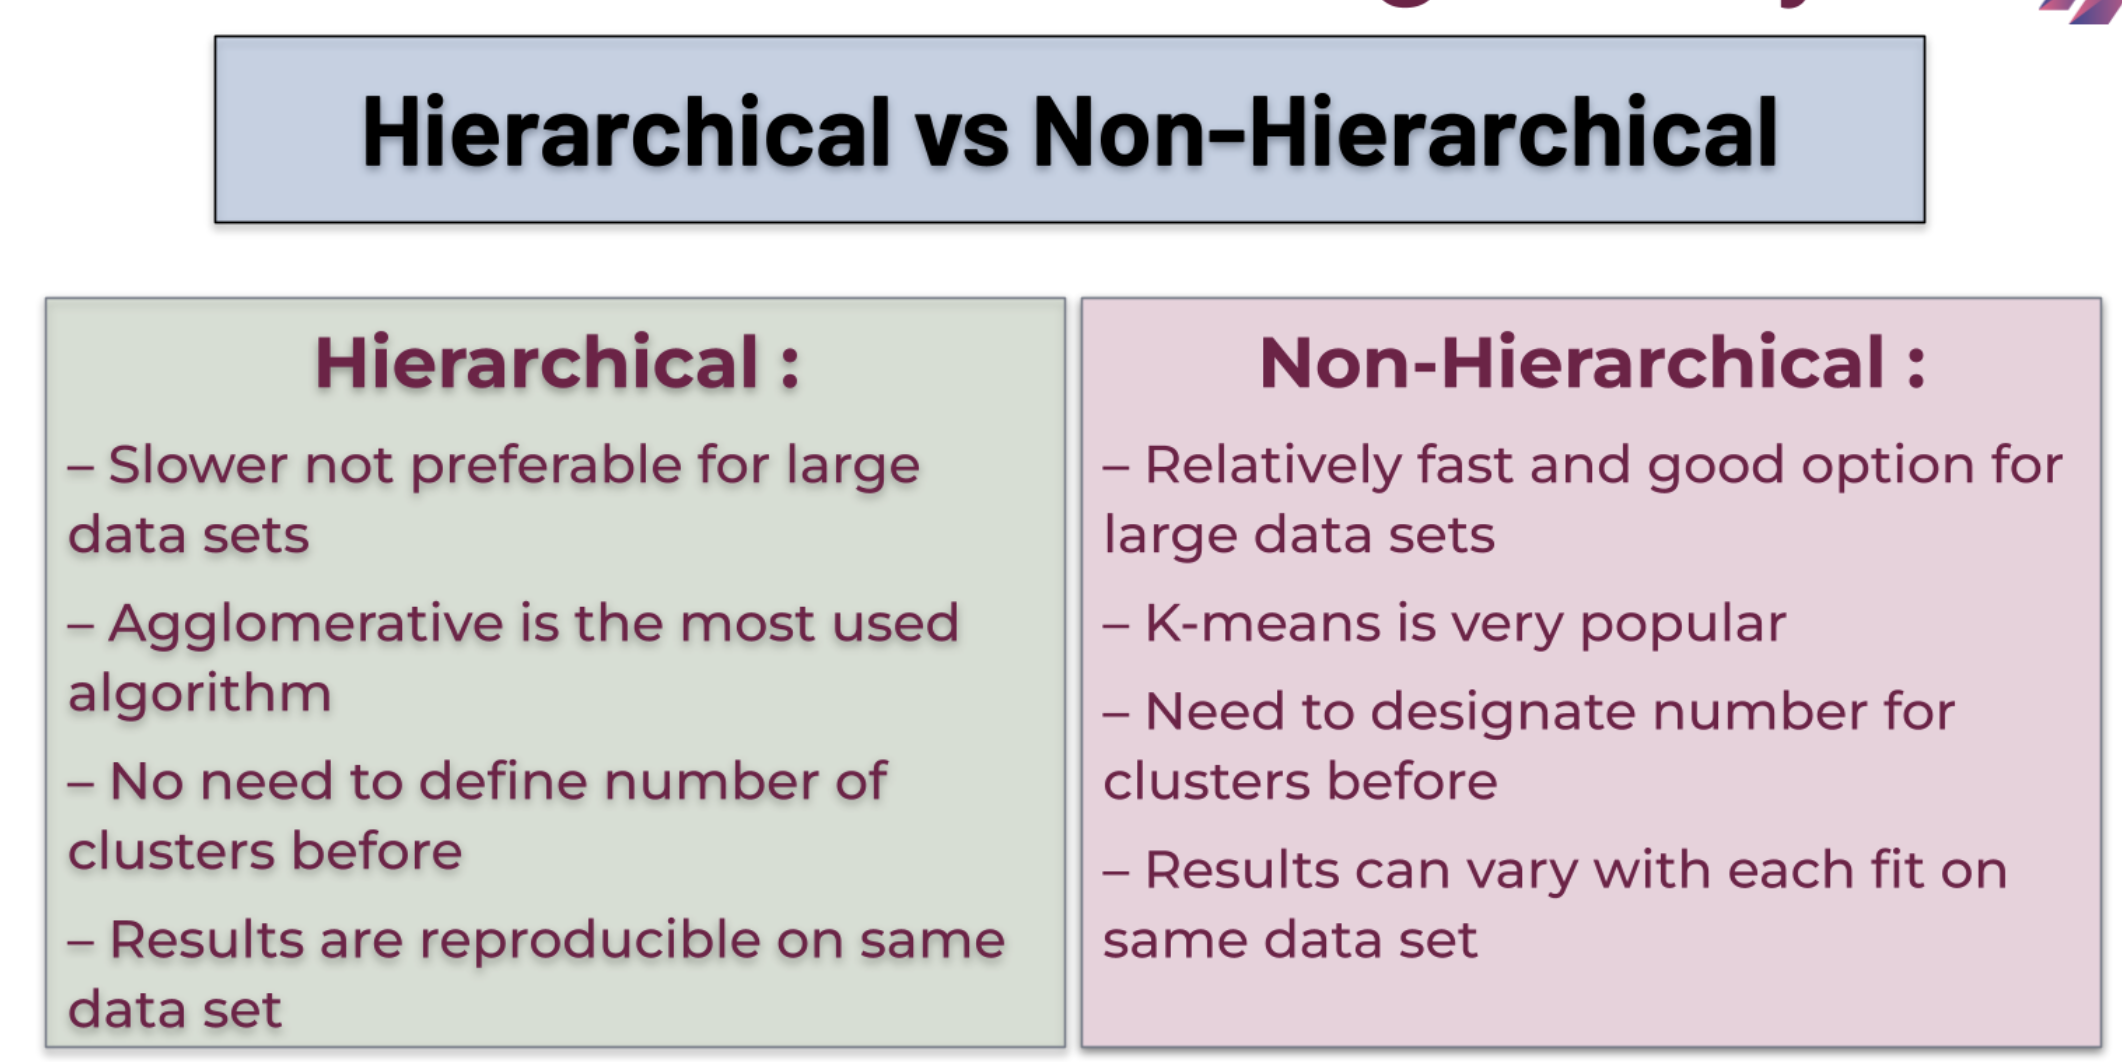

# Hands-on

In [5]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import AgglomerativeClustering


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt

%matplotlib inline

In [7]:
tests = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/testperform_long.csv")
tests.head()

,id,name,value,test
0,1,zero,64.270000,0
1,1,one,65.950884,1
2,1,two,69.865513,2
3,1,three,70.071844,3
4,1,four,71.557456,4


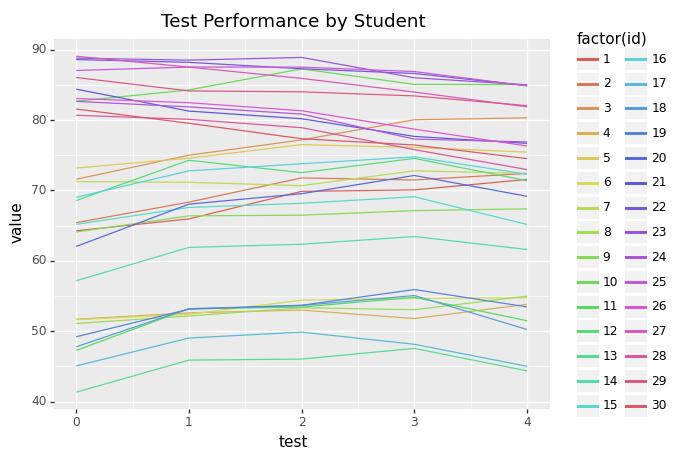

<ggplot: (8789957629690)>

In [8]:
(ggplot(tests, aes("test", "value", color = "factor(id)")) + geom_line() +
  ggtitle("Test Performance by Student"))

In [9]:
# wide data

tests_wide = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/testperform.csv")

tests_wide.head()

,zero,one,two,three,four,id
0,64.27,65.950884,69.865513,70.071844,71.557456,1
1,65.42,68.334638,71.774954,71.488519,72.414197,2
2,71.58,75.002741,77.169056,80.038548,80.307990,3
3,51.71,52.610899,53.005482,51.800135,53.829034,4
4,73.18,74.575287,76.507547,76.102415,75.441424,5


In [10]:
features = ["zero", "one", "two", "three", "four"]

X = tests_wide[features]

hac = AgglomerativeClustering(affinity = "euclidean",
                             linkage = "ward")

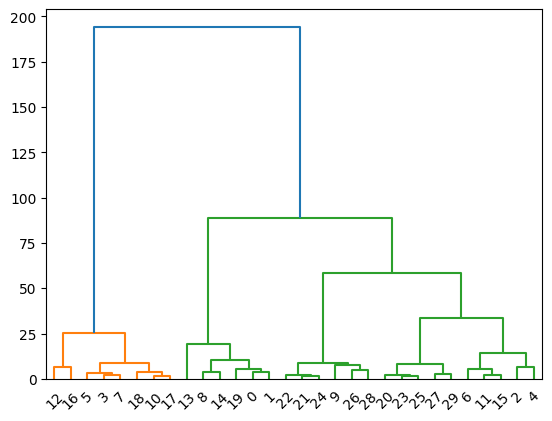

In [11]:
hac.fit(X)

dendro = sch.dendrogram(sch.linkage(X, method='ward'))

In [12]:
hac = AgglomerativeClustering(n_clusters = 3,
                              affinity = "euclidean",
                             linkage = "ward")
hac.fit(X)

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

In [13]:
membership = hac.labels_
membership

array([2, 2, 0, 1, 0, 1, 0, 1, 2, 0, 1, 0, 1, 2, 2, 0, 1, 1, 1, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0])

In [14]:
silhouette_score(X,membership)

0.5275892679012398

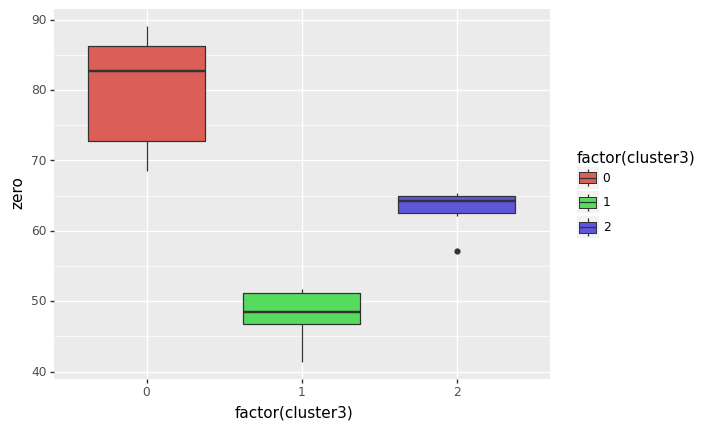

<ggplot: (8789948602055)>

In [15]:
tests_wide["cluster3"] = membership
(ggplot(tests_wide, aes(x = "factor(cluster3)", y = "zero")) + geom_boxplot(aes(fill = "factor(cluster3)")))

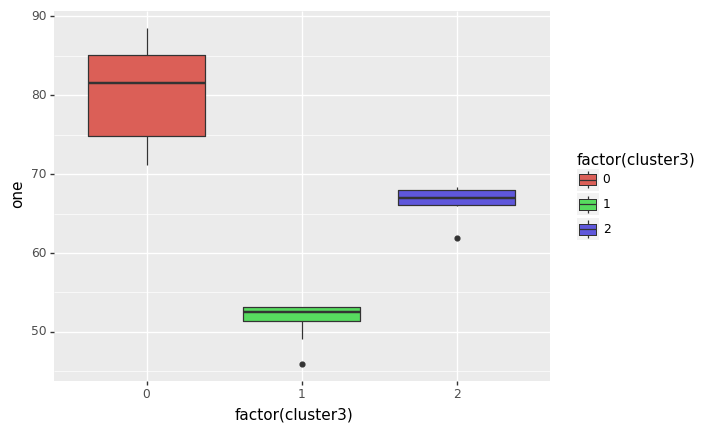

<ggplot: (8789958073498)>

In [16]:
(ggplot(tests_wide, aes(x = "factor(cluster3)", y = "one")) + geom_boxplot(aes(fill = "factor(cluster3)")))

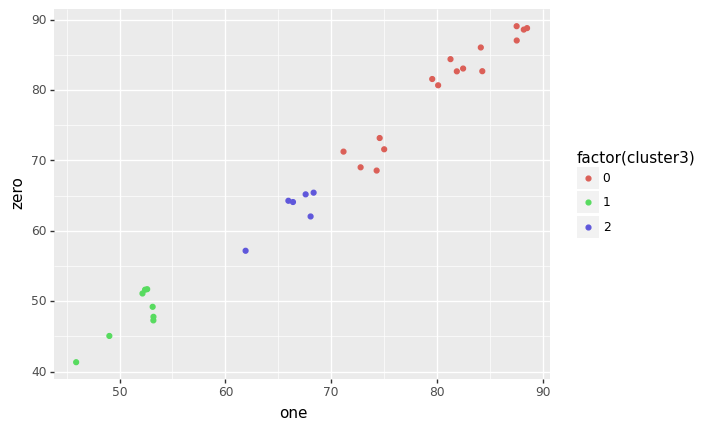

<ggplot: (8789958299263)>

In [17]:
(ggplot(tests_wide, aes(x = "one", y = "zero")) + geom_point(aes(color = "factor(cluster3)")))

# makeup

In [18]:
makeup = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/makeup.csv")
makeup.head()

,eyeshaddow,lipstick,foundation
0,4,8,4
1,11,13,4
2,8,11,4
3,11,18,3
4,10,12,3


In [19]:
hac2 = AgglomerativeClustering(n_clusters = 3,
                               affinity = "cosine",
                              linkage = "average")

hac2.fit(makeup)

AgglomerativeClustering(affinity='cosine', linkage='average', n_clusters=3)

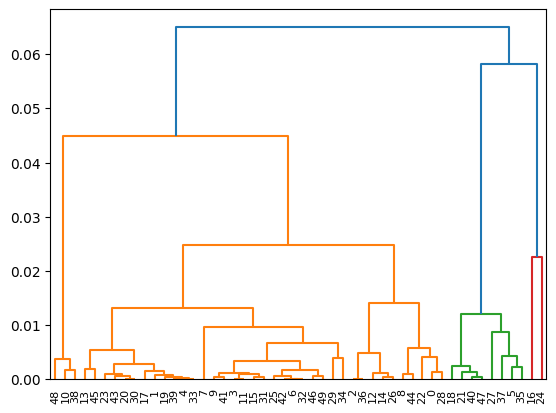

In [20]:
dendro = sch.dendrogram(sch.linkage(makeup, metric = "cosine", method='average'))

In [21]:
membership = hac2.labels_
membership

array([0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2,
       0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 0, 0])

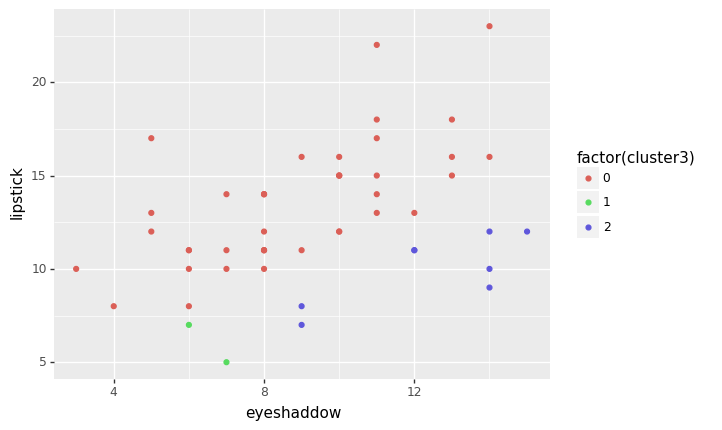

<ggplot: (8789958604264)>

In [22]:
makeup["cluster3"] = membership

(ggplot(makeup, aes(x = "eyeshaddow", y = "lipstick")) + geom_point(aes(color = "factor(cluster3)")))

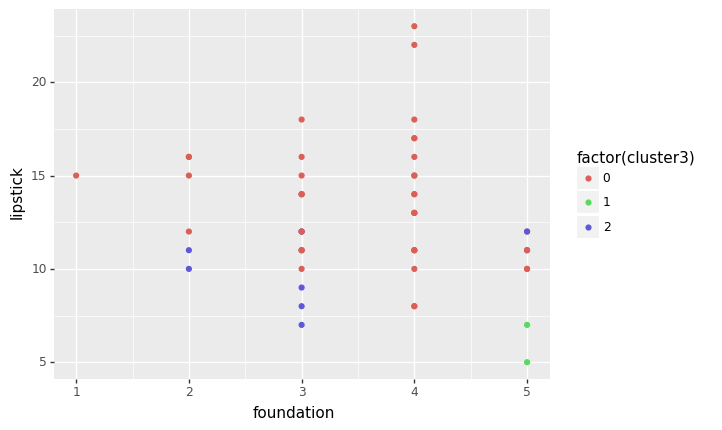

<ggplot: (8789958645691)>

In [23]:
(ggplot(makeup, aes(x = "foundation", y = "lipstick")) + geom_point(aes(color = "factor(cluster3)")))

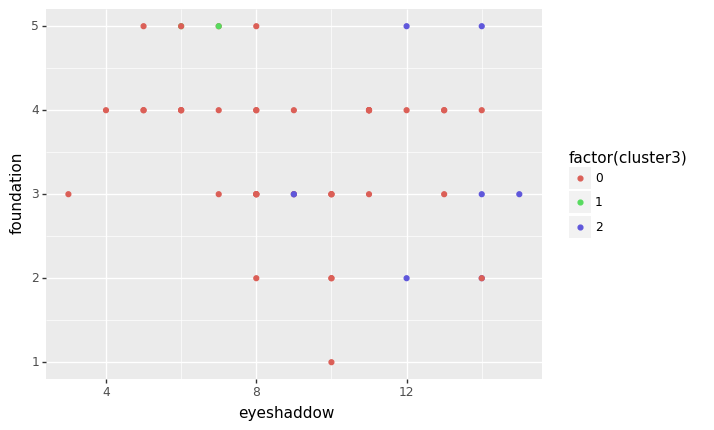

<ggplot: (8789958790382)>

In [24]:
(ggplot(makeup, aes(x = "eyeshaddow", y = "foundation")) + geom_point(aes(color = "factor(cluster3)")))